In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.11.0
2.11.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

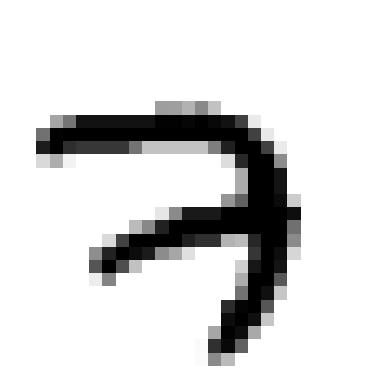

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

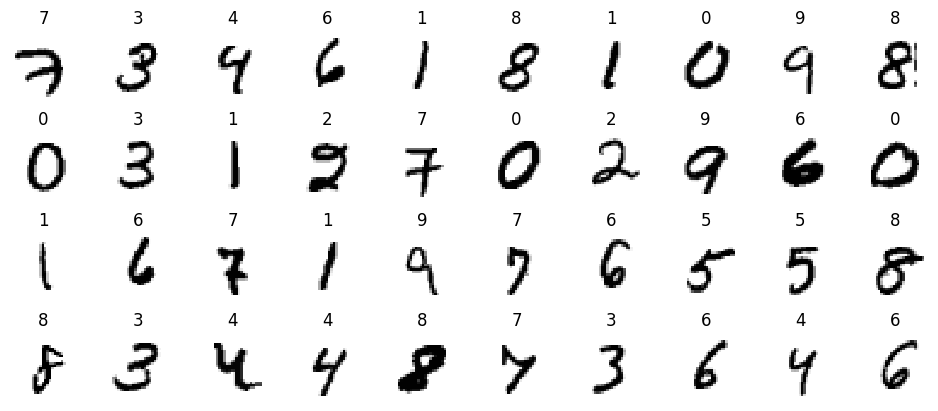

In [8]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [9]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [10]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2023-06-10 10:17:55.156994: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5970 - accuracy: 0.8442 - val_loss: 0.3057 - val_accuracy: 0.9160
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2882 - accuracy: 0.9180 - val_loss: 0.2409 - val_accuracy: 0.9314
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2371 - accuracy: 0.9323 - val_loss: 0.2017 - val_accuracy: 0.9428
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2030 - accuracy: 0.9424 - val_loss: 0.1798 - val_accuracy: 0.9514
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1775 - accuracy: 0.9491 - val_loss: 0.1602 - val_accuracy: 0.9574
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1574 - accuracy: 0.9554 - val_loss: 0.1475 - val_accuracy: 0.9586
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1410 - accuracy: 0.9599 - val_loss: 0.1339 - val_accuracy:

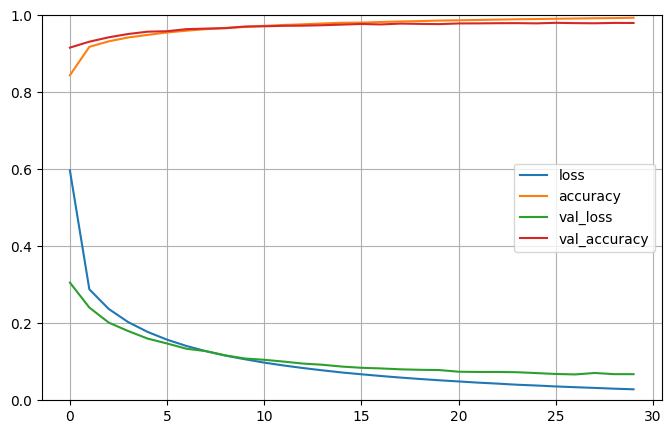

In [13]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 758us/step - loss: 0.0699 - accuracy: 0.9776


[0.06994408369064331, 0.9775999784469604]

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 63ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

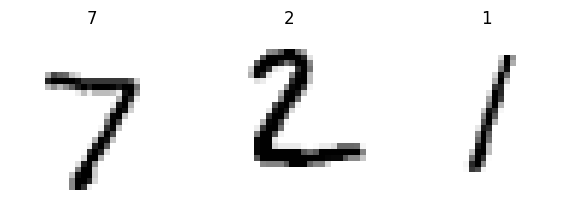

In [16]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.
Do modelu dodaj
 
```python
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))
```

w każdej warstwie.

Zwizualizuj wyniki:

* porównaj krzywe uczenia


In [31]:
from keras.layers import Dense, BatchNormalization, Activation,Dropout

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
])
model.add(keras.layers.Dense(300, activation="relu"),)
model.add(BatchNormalization()),
model.add(Activation("relu")),
model.add(Dropout(0.3))

model.add(keras.layers.Dense(100, activation="relu"),)
model.add(BatchNormalization()),
model.add(Activation("relu")),
model.add(Dropout(0.3)),

model.add(keras.layers.Dense(10, activation="softmax"),)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                        

In [32]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [33]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6497 - accuracy: 0.8094 - val_loss: 0.2308 - val_accuracy: 0.9420
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3509 - accuracy: 0.9012 - val_loss: 0.1669 - val_accuracy: 0.9558
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2809 - accuracy: 0.9207 - val_loss: 0.1367 - val_accuracy: 0.9624
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2402 - accuracy: 0.9323 - val_loss: 0.1200 - val_accuracy: 0.9658
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2112 - accuracy: 0.9409 - val_loss: 0.1111 - val_accuracy: 0.9704
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1944 - accuracy: 0.9436 - val_loss: 0.1012 - val_accuracy: 0.9732
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1762 - accuracy: 0.9487 - val_loss: 0.0970 - val_accuracy:

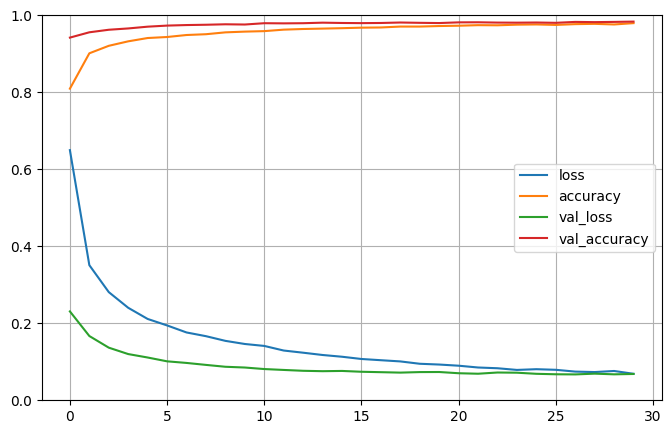

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()